In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.animation import FuncAnimation, PillowWriter

In [ ]:
import numpy as np
def gaussian_equation(x, mu, sigma):
  """Genera una ecuación gaussiana.

  Args:
    x: Valores de x para los que se quiere calcular la función.
    mu: Media de la distribución.
    sigma: Desviación estándar de la distribución.

  Returns:
    Valores de la función gaussiana para los valores de x dados.
  """
  return (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-((x - mu) ** 2) / (2 * sigma ** 2))

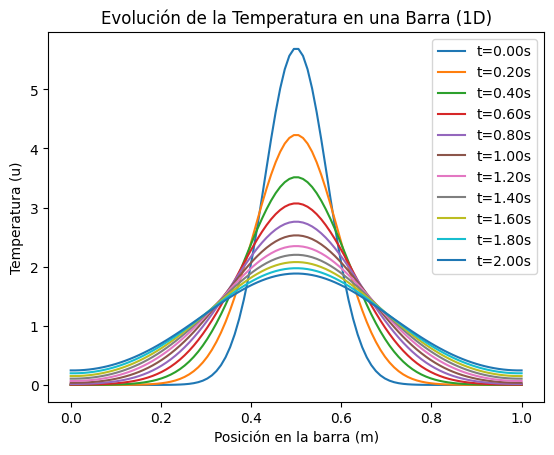

In [ ]:
# Parámetros de la ecuación y de la simulación
alpha = 0.01  # Difusividad térmica
L = 1.0       # Longitud de la barra (en metros)
T = 2.0       # Tiempo total de la simulación (en segundos)
nx = 100      # Número de puntos en la discretización espacial
nt = 4999     # Número de pasos de tiempo
dx = L / (nx - 1)  # Tamaño del paso espacial
dt = T / nt   # Tamaño del paso temporal

# Estabilidad (número de Fourier)
Fo = alpha * dt / dx**2
if Fo > 0.5:
    raise ValueError(f"El número de Fourier (Fo = {Fo}) es mayor que 0.5, lo que puede causar inestabilidad.")

# Condiciones iniciales: Distribución sinusoidal a lo largo de la barra
#u = np.sin(np.pi * np.linspace(0, L, nx))



mu = L/2
sigma = 0.07
x = np.linspace(0, L, nx)
u = gaussian_equation(x, mu, sigma)

# Parámetros de la fuente de calor constante
#source_position = int(3*nx / 4)  # Posición central de la barra
#source_value = 1.0  # Valor de la fuente de calor que se añade en cada paso de tiempo

# Preparamos una matriz para almacenar la evolución temporal de la temperatura
u_hist = [u.copy()]  # Guardamos el estado inicial

# Iteramos en el tiempo aplicando el esquema de diferencias finitas
for n in range(nt):
    u_new = u.copy()
    for i in range(1, nx-1):
        u_new[i] = u[i] + Fo * (u[i+1] - 2*u[i] + u[i-1])

    # Añadir la fuente constante en el centro de la barra
    #u_new[source_position] += source_value

    # Condiciones de frontera de Neumann (gradiente cero, aislamiento)
    u_new[0] = u_new[1]   # Aislamiento térmico en el extremo izquierdo
    u_new[-1] = u_new[-2]  # Aislamiento térmico en el extremo derecho

    u = u_new.copy()  # Actualizamos el estado
    u_hist.append(u.copy())  # Guardamos la nueva distribución

# Convertimos la historia de u a un arreglo de numpy para manipulación posterior
u_hist = np.array(u_hist)

# ===========================================================
# Visualización de la solución
# ===========================================================

# Graficamos la evolución de la temperatura en el tiempo
fig, ax = plt.subplots()
for i in range(0, nt, nt // 10):  # Mostramos 10 curvas a lo largo del tiempo
    ax.plot(np.linspace(0, L, nx), u_hist[i], label=f"t={i*dt:.2f}s")

ax.set_xlabel('Posición en la barra (m)')
ax.set_ylabel('Temperatura (u)')
ax.set_title('Evolución de la Temperatura en una Barra (1D)')
ax.legend()
plt.savefig('evol_temperatura.jpg')
plt.show()


In [ ]:
# Ntiempo=10

# Temp = np.repeat(u_hist[Ntiempo], 100).reshape(50, 100)
Lx=1
Ly=0.1
ny=100
x=np.linspace(0, Lx, nx)
y=np.linspace(0, Ly, ny)
X, Y = np.meshgrid(x,y)

Temp = np.zeros((nt+1, nx, ny))
# Evolucion temporal , y construccion de la barra
for i in range(0, nt+1):
  Temp[i] = np.repeat(u_hist[i], ny).reshape(nx, ny)

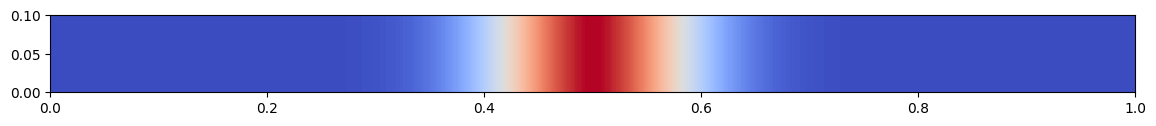

In [ ]:
maxT = np.max(Temp)
fig, ax = plt.subplots(figsize=(14, 1))

contour = ax.contour(X, Y, Temp[0].T/maxT, 200, vmin=0, vmax=1, cmap='coolwarm')  # Actualizar con el nuevo frame
#ax.set_colorbar()
ax.set_xlabel('Posición en la barra (m)')
ax.set_ylabel('Ly')
ax.set_title('Evolución de la Temperatura en una Barra (1D)')

def update(frame):
    ax.clear()  # Limpiar el gráfico anterior
    contour = ax.contourf(X, Y, Temp[frame].T/maxT, 200, vmin=0, vmax=1, cmap='coolwarm')  # Actualizar con el nuevo frame
    return contour,


# Crear la animación con un intervalo mayor y repetir en False
ani = FuncAnimation(fig, update, frames=range(0, nt+1, 50), interval=100, repeat=False)
ani.save("mapa_calor.gif", writer=PillowWriter(fps=10))

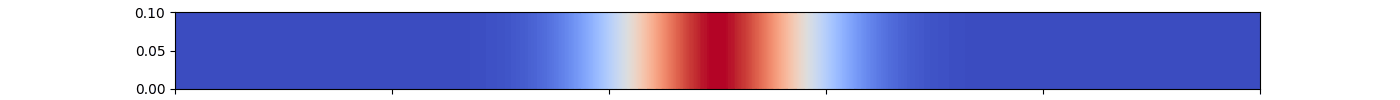

In [ ]:
from IPython.display import Image
Image(filename="mapa_calor.gif")

<ipython-input-7-526409c4b586>:28: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # Ajustar para dar espacio a la barra de color


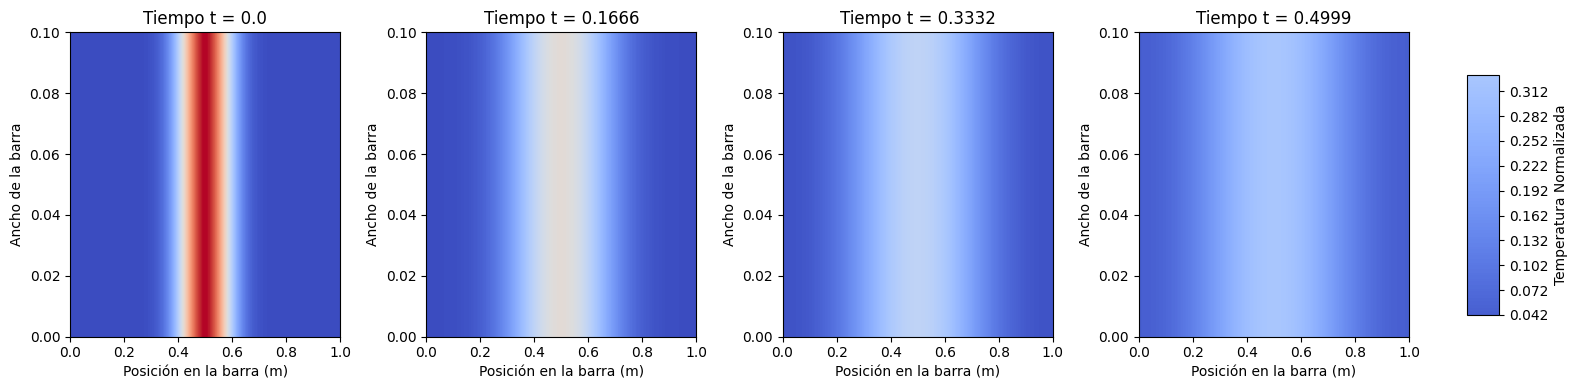

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Suponiendo que X, Y y Temp ya están definidos
maxT = np.max(Temp)
frames_to_plot = 4  # Número de frames a mostrar
timesteps = np.linspace(0, Temp.shape[0] - 1, frames_to_plot, dtype=int)  # Elegir 4 tiempos equidistantes

# Crear una figura con 1 fila y 4 columnas
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16, 4))

# Crear un único mapa de colores para todas las imágenes
vmin, vmax = 0, 1  # Normalizar los valores

# Generar los 4 frames en la misma imagen
for i, ax in enumerate(axes.flat):  # `flat` convierte la matriz en lista
    t = timesteps[i]  # Tiempo actual del frame
    contour = ax.contourf(X, Y, Temp[t].T / maxT, 200, vmin=vmin, vmax=vmax, cmap='coolwarm')
    ax.set_title(f'Tiempo t = {t/10000}')
    ax.set_xlabel('Posición en la barra (m)')
    ax.set_ylabel('Ancho de la barra')

# Añadir una barra de color común para toda la figura
cbar_ax = fig.add_axes([0.92, 0.2, 0.02, 0.6])  # Posición de la barra de color
fig.colorbar(contour, cax=cbar_ax, label='Temperatura Normalizada')

# Ajustar el espacio entre subgráficos
plt.tight_layout(rect=[0, 0, 0.9, 1])  # Ajustar para dar espacio a la barra de color

# Guardar la imagen final con los 4 frames
plt.savefig("mapa_calor_evolucion.png", dpi=300, bbox_inches='tight')

# Mostrar la imagen
plt.show()

In [ ]:
# prompt: guardar los datos de u_hist como .npy

import numpy as np
np.save('u_hist.npy', u_hist)
